# Train sample notebook

## Setting
set up all hyper parameters and configurations here

In [1]:
# config
data_root = "data"

# training hyperparameters
val_crop_size=224
train_crop_size=176

## Import & Setup

In [34]:
import importlib
import utils; importlib.reload(utils)
import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms as T
from torchvision.models import resnet50, ResNet50_Weights
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False

device = utils.torch.detect_device(verbose=False)
torch.device(device)

device(type='mps')

In [3]:
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()
val_preprocess = weights.transforms()
val_preprocess

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [5]:
train_preprocess = T.Compose([
    T.Resize([232, ]),
    T.CenterCrop(train_crop_size),
    T.PILToTensor(),
    T.ConvertImageDtype(torch.float),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
train_preprocess

Compose(
    Resize(size=[232], interpolation=bilinear, max_size=None, antialias=warn)
    CenterCrop(size=(176, 176))
    PILToTensor()
    ConvertImageDtype()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

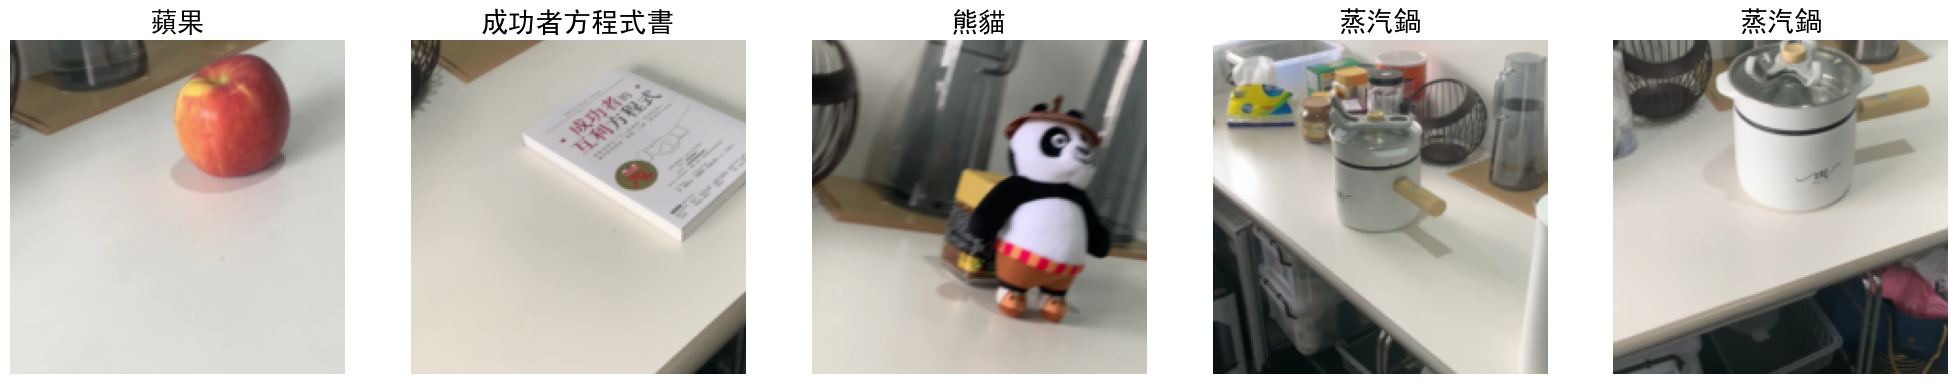

In [27]:
dataset = ImageFolder(root='./data', transform=train_preprocess)

utils.plots.random_plot_dataset(dataset, n_example=5)